In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# data folder, e.g. 'MyCourse/03_deeplearning/01_learning_libs/01_keras/01_keras_workshop/'
FOLDERNAME = 'MyCourse/03_deeplearning/01_learning_libs/01_keras/01_keras_workshop/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd drive/My\ Drive/$FOLDERNAME
%ls -la

Mounted at /content/drive
/content/drive/My Drive/MyCourse/03_deeplearning/01_learning_libs/01_keras/01_keras_workshop
total 276
-rw------- 1 root root  20474 Mar 22 23:10 2d_curve.dat
-rw------- 1 root root 261899 Mar 23 21:11 keras_workshop_tutorial.ipynb


In [2]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import rc
import seaborn as sns

In [3]:
def set_style():
    rc('mathtext', default='regular')
    sns.set_style('ticks')
    sns.set(style="ticks", rc={'axes.linewidth': 3.0, 'font.family': "sans-serif"})    
    sns.set_context("paper",font_scale = 3.0, rc={"font.size":20,
                                                  "axes.titlesize":20,
                                                  "axes.labelsize":25,
                                                  "lines.linewidth": 2.5})
set_style()

# Case1: A regression model for 2D curve fitting

## Loading training data

(400, 2)


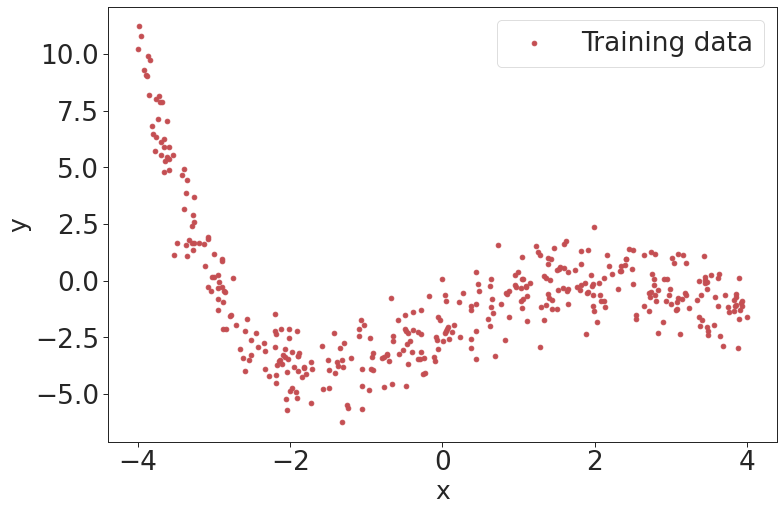

In [4]:
train_data = np.loadtxt('2d_curve.dat', delimiter=' ')
print(train_data.shape)

fig, axes = plt.subplots(nrows = 1, ncols= 1, figsize= (12, 8))
axes.set_xlabel('x')
axes.set_ylabel('y')

x_train = train_data[:, 0]
y_train = train_data[:, 1]
axes.scatter( x_train, y_train, color = 'r', marker='o', label = 'Training data')
axes.legend() 
# 1d input 1d output

## Creating the network architecture 

In [ ]:
from keras import models 
from keras import layers 
from keras import optimizers
from keras import losses 
from keras import metrics
from keras import initializers

In [ ]:
# Create a neural network 
np.random.seed(11)
model = models.Sequential(
    [
      layers.Dense(10, activation="relu", name="layer1-hidden", input_shape = (1, )), # just mention the shape of a data point (1d input)
      layers.Dense(6, activation="sigmoid", name="layer2-hidden"),
      layers.Dense(1, activation="linear", name="layer3-output"),   # a linear layer for regression problem (1d output) the output is not bounded 
    ]
)
# Setup hyperparameters for a neural network (we need a loss function and an optimizer)
model.compile( optimizer = 'adam',
                loss = 'MSE') # loss = square(y_true - y_pred)


## Training the model

In [ ]:
history = model.fit( x_train, y_train, epochs=800, verbose = 1)

Epoch 1/800
13/13 [==============================] - 1s 2ms/step - loss: 9.1665
Epoch 2/800
13/13 [==============================] - 0s 1ms/step - loss: 9.5103
Epoch 3/800
13/13 [==============================] - 0s 1ms/step - loss: 9.6627
Epoch 4/800
13/13 [==============================] - 0s 1ms/step - loss: 8.6982
Epoch 5/800
13/13 [==============================] - 0s 1ms/step - loss: 8.8331
Epoch 6/800
13/13 [==============================] - 0s 1ms/step - loss: 8.9001
Epoch 7/800
13/13 [==============================] - 0s 1ms/step - loss: 8.3782
Epoch 8/800
13/13 [==============================] - 0s 1ms/step - loss: 8.4898
Epoch 9/800
13/13 [==============================] - 0s 2ms/step - loss: 7.7867
Epoch 10/800
13/13 [==============================] - 0s 1ms/step - loss: 8.6657
Epoch 11/800
13/13 [==============================] - 0s 2ms/step - loss: 8.6755
Epoch 12/800
13/13 [==============================] - 0s 1ms/step - loss: 8.4989
Epoch 13/800
13/13 [=================

<function matplotlib.pyplot.tight_layout>

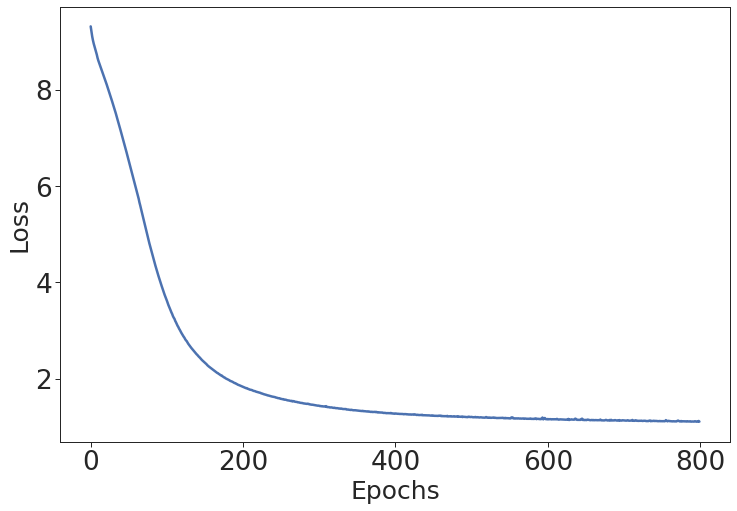

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']

fig, axes = plt.subplots(nrows = 1, ncols= 1, figsize= (12, 8))
plt.plot(loss_values)
plt.xlabel( 'Epochs')
plt.ylabel('Loss')

plt.tight_layout


## Evaluating the fit model

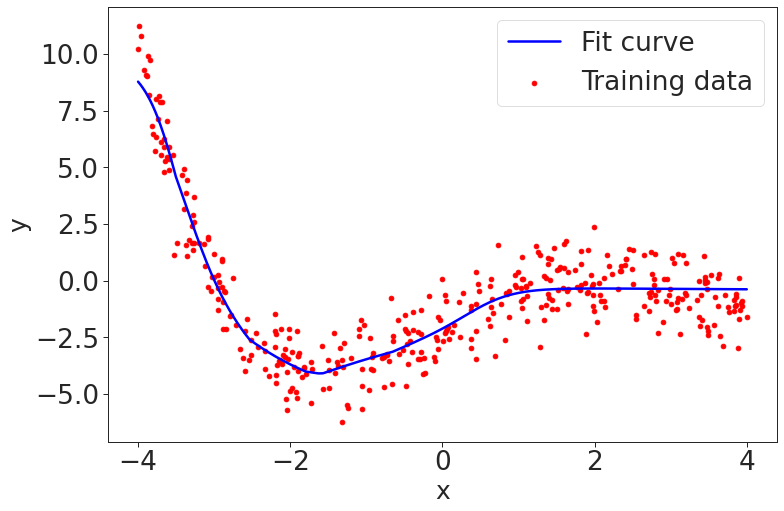

In [ ]:
pred_xvalues = np.linspace( -4.0, 4.0, 1000) 
pred_yvalues = model.predict(pred_xvalues)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 8))
axes.set_xlabel('x')
axes.set_ylabel('y')

axes.plot(pred_xvalues, pred_yvalues, color = 'blue', label = 'Fit curve')
axes.scatter( x_train, y_train, color = 'red', label = 'Training data')

axes.legend()

# Case2: A classification model with the MNIST dataset



## Loading the MNIST dataset in Keras

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images , train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

## Preprocessing training data


In [ ]:
case_num = 10 
row_num = 2 
col_num = 5 
i = 0 
plt_idx = 0 

In [ ]:
train_images = train_images.reshape(60000, 28*28)
# Normalize image data to a certain range 
train_images = train_images.astype('float32')/255

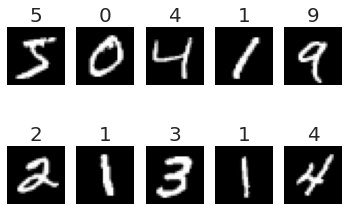

In [ ]:
for case in range(case_num):
  plt.subplot(2, 5, case + 1)
  
  plt.imshow( train_images[case, :].reshape(28, 28),cmap='gray')
  plt.title( train_labels[case])
  plt.axis('off')

### Preparing the labels 

In [ ]:
from keras.utils import to_categorical
print("Training label {}".format( train_labels[0] ))
train_labels = to_categorical(train_labels) # turn a vector class into a matrix class
print("Training array {}".format(train_labels[0,:]))

Training label 5
Training array [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Creating the network architecture 

In [ ]:
network = models.Sequential(  
          [
              layers.Dense( 512, activation='relu', input_shape = (28*28, )), # input dimension (784)
              layers.Dense(10, activation='softmax'),   # output dimension (10)
          ]
)


In [ ]:
history = network.compile( optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'] )

## Training the model

In [ ]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=128) # epoch and batch size are two hyperparameters to be tuned 

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4246 - accuracy: 0.8771
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1135 - accuracy: 0.9675
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0719 - accuracy: 0.9780
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0486 - accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0339 - accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0252 - accuracy: 0.9925
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0202 - accuracy: 0.9943
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0152 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0085 - accuracy: 0.9976

<function matplotlib.pyplot.tight_layout>

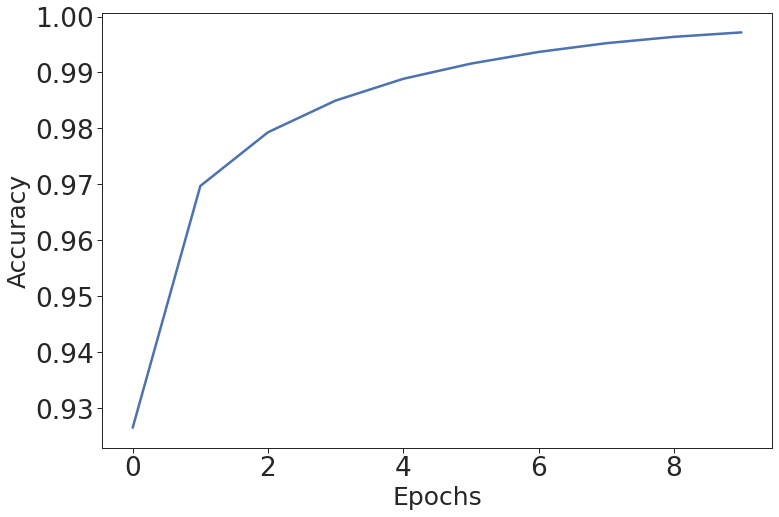

In [ ]:
history_dict = history.history
loss_values = history_dict['accuracy']

fig, axes = plt.subplots(nrows = 1, ncols= 1, figsize= (12, 8))
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout


## Evaluating the classfication model


In [ ]:
pred_value = network.predict( train_images[0,:].reshape(1, 784))
print("Predicted probabilities for 10 classes:") 
print( pred_value ) 

Predicted probabilities for 10 classes:
[[1.1665626e-16 1.9031477e-14 2.4547779e-12 9.8775317e-06 4.5018882e-27
  9.9999011e-01 1.9965652e-20 6.5267743e-16 2.3416392e-14 2.2772057e-13]]


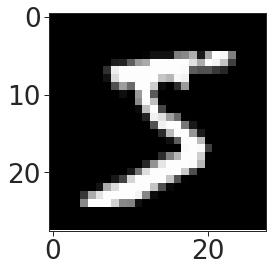

In [ ]:
plt.imshow( train_images[0, :].reshape(28, 28),cmap='gray')